In [ ]:
# remove_digits = str.maketrans('0123456789', '//////////')
# 'ok bro3 je mange 656 caroot4E et toi pti69t gars4'.translate(remove_digits)

In [3]:
import pandas as pd

In [4]:
dfbert=pd.read_csv("../data/bert_data/X_bert_cluster_3000.csv")
dfmeta=pd.read_json("../data/raw_data/raw_movies/metadata.json",lines=True)
dfr=pd.read_json("../data/raw_data/raw_movies/reviews.json",lines=True)

In [5]:
dfrunique=pd.DataFrame(dfr["item_id"].unique())

In [6]:
dfrunique

,0
0,172063
1,95541
2,7065
3,3739
4,1562
...,...
52076,105446
52077,115042
52078,72100
52079,153066


In [7]:
new_meta=pd.merge(dfmeta,dfrunique,left_on="item_id",right_on=0,how="right")

In [8]:
new_meta.to_json("newmetadata.json")

In [12]:
new_meta.title

0                                        Carmencita (1894)
1                                  Blacksmith Scene (1893)
2                            Birth of a Nation, The (1915)
3                               Trouble in Paradise (1932)
4                                    Batman & Robin (1997)
                               ...                        
52076    Tale from the Past, A (Përralle Nga e Kaluara)...
52077    More About the Children of Noisy Village (a.k....
52078    Jungle Book of Regulations, A (Nie Ma Rozy Bez...
52079                                     Landscape (2003)
52080            Eugene, Little Eugene and Katyusha (1967)
Name: title, Length: 52081, dtype: object

In [13]:
new_meta["title"]=="Carmencita (1894)"

0         True
1        False
2        False
3        False
4        False
         ...  
52076    False
52077    False
52078    False
52079    False
52080    False
Name: title, Length: 52081, dtype: bool

In [39]:
import pickle

In [40]:
# Store data (serialize)
with open('metadata.pickle', 'wb') as handle:
    pickle.dump(new_meta, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # Load data (deserialize)
# with open('./../notebook_temp/bert.pickle', 'rb') as handle:
#     bert = pickle.load(handle)

In [4]:
dfmetaupdated=pd.read_json("../data/raw_data/raw_movies/metadata_updated.json",lines=True)


In [5]:
dfbert.item_id_movie.nunique()

NameError: name 'dfbert' is not defined

In [6]:
dfmeta.item_id.nunique()

NameError: name 'dfmeta' is not defined

In [8]:
dfr.item_id.nunique()

52081

In [9]:
dfmetaupdated.item_id.nunique()

84661

In [10]:
l=[]
for i in dfmetaupdated.title:
    l.append(i[i.find("(")+1:i.find(")")])


In [11]:
ll=[]
for i in l:
    try:
        ll.append(int(i))
    except:
        ll.append(2030)

In [12]:
dfmetaupdated.item_id

0             1
1             2
2             3
3             4
4             5
          ...  
84656    239306
84657    239308
84658    239310
84659    239312
84660    239314
Name: item_id, Length: 84661, dtype: int64

In [13]:
dfdate=pd.DataFrame({"date":ll,"movie_id":dfmetaupdated.item_id})

In [14]:
dfdate

,date,movie_id
0,1995,1
1,1995,2
2,1995,3
3,1995,4
4,1995,5
...,...,...
84656,1976,239306
84657,1974,239308
84658,2019,239310
84659,2020,239312


In [22]:
dfcount=dfr.groupby("item_id").sum().reset_index().sort_values("txt",ascending=False)
dfcount

,item_id,txt
47380,170817,⭐⭐⭐⭐; We were lucky enough to be invited to th...
37969,148424,​A controversial movie that deserves to be vie...
46041,167572,Ηercules 2 is of the best sequel of Disney; Ηe...
23973,113101,über-Finnish antics; Maata meren alla (Land be...
42513,159393,Þór og Danni on a farm; this movie is the seco...
...,...,...
36071,144025,LOTS OF INFIDELITY AND LIES !; Enjoyed view...
42663,159737,A powerful drama about the plight of teen mot...
27316,123087,A brutal and cutting but ultimately enjoyable...
37314,146882,A Mafia/Thriller cocktail that tastes good.; ...


In [59]:
dfcount["count"]=dfcount["txt"].apply(lambda x: len(x.split()))
dfcount.sort_values(by="count",ascending=False,inplace=True)
dfcount

,item_id,txt,count
27228,122886,amazing return to the star wars universe; We'v...,1571206
12523,58559,the best batman movie till date! take a bow di...,1510458
4865,4993,"It grew on me; Unlike most people, i wasn't tr...",1241476
32946,136864,It's an OK movie; don't go to the cinema with ...,1147886
10098,33493,Lucas does good !; As a lifelong Star Wars fan...,1082263
...,...,...,...
17511,88215,An innovative triumph of low budget; This is a...,33
34983,141546,Great; I always liked 'Aibolit' by Kornei Chuk...,32
30484,131213,"Beautiful film!; Classic tale of love, family ...",32
35978,143791,A MASTERPIECE; Incredibly well acted and direc...,26


/tmp/ipykernel_58753/3152381621.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax1=sns.histplot(data=dfcount, x="count", palette="Set1",binwidth=100)


(0.0, 10000.0)

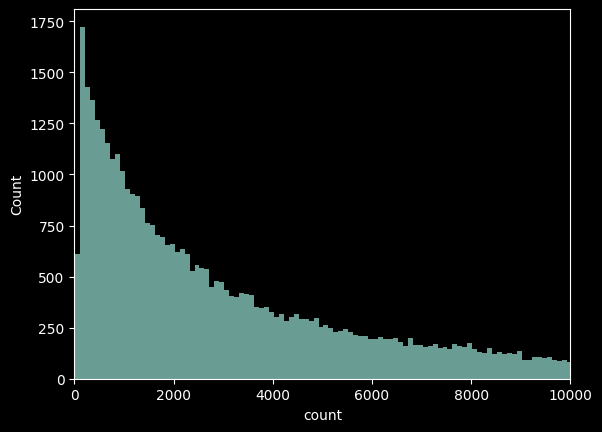

In [120]:
import seaborn as sns
ax1=sns.histplot(data=dfcount, x="count", palette="Set1",binwidth=100)
ax1.set_xlim(0,10000)

In [60]:
dfmerge=dfdate.merge(dfcount,left_on="movie_id",right_on="item_id",how="left").fillna(0)
dfmerge.sort_values(by="count",ascending=False,inplace=True)
dfmerge

,date,movie_id,item_id,txt,count
27895,2015,122886,122886.0,amazing return to the star wars universe; We'v...,1571206.0
12563,2008,58559,58559.0,the best batman movie till date! take a bow di...,1510458.0
4898,2001,4993,4993.0,"It grew on me; Unlike most people, i wasn't tr...",1241476.0
34093,2016,136864,136864.0,It's an OK movie; don't go to the cinema with ...,1147886.0
10135,2005,33493,33493.0,Lucas does good !; As a lifelong Star Wars fan...,1082263.0
...,...,...,...,...,...
62913,2015,195705,0.0,0,0.0
62912,2018,195703,0.0,0,0.0
62911,2015,195701,0.0,0,0.0
62910,2030,195699,0.0,0,0.0


In [71]:
df=dfmerge[["date","count"]].groupby("date").sum().reset_index()
df

,date,count
0,1,0.0
1,2,0.0
2,6,1082.0
3,69,0.0
4,186,0.0
...,...,...
140,2018,250.0
141,2019,0.0
142,2020,0.0
143,2021,0.0


In [72]:
import seaborn as sns


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    145 non-null    int64  
 1   count   145 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


In [88]:
import matplotlib.pyplot as plt

(1990.0, 2020.0)

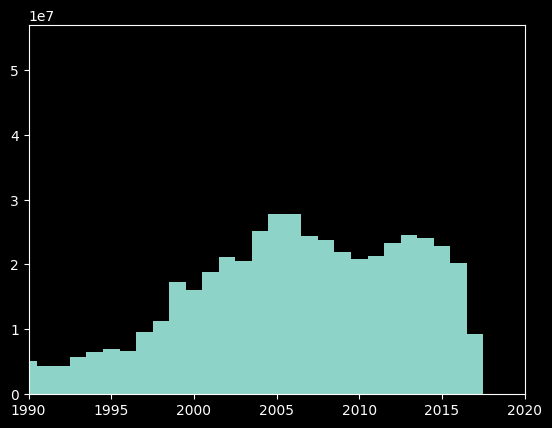

In [99]:
plt.bar(df["date"],df["count"],width=1)
plt.xlim(1990,2020)

In [15]:
i="ezdzed(oij ) dzeoijd"

In [16]:
i[i.find("(")+1:i.find(")")]

'oij '